# Logistic Regression

<b>Logistic regression measures the relationship between the categorical target variable and one or more independent variables. It is useful for situations in which the outcome for a target variable can have only two possible types (in other words, it is binary).</b><br><br>
More information regarding logistic regression could be read from [Link](https://en.wikipedia.org/wiki/Logistic_regression)
<br>
<br>I have used `Titanic dataset` from <b> [Kaggle Link](https://www.kaggle.com/c/titanic)</b>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading titanic dataset in a dataframe using Pandas
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


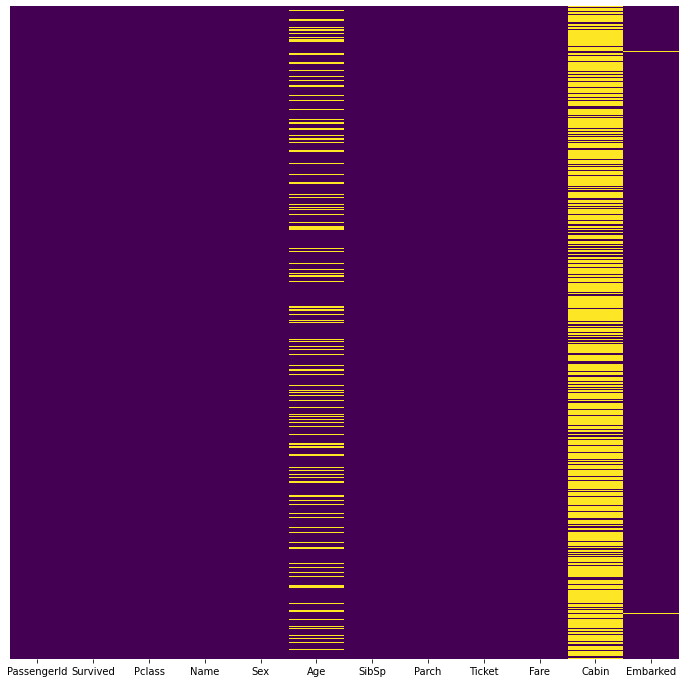

In [3]:
# To check which columns in the dataframe have null values we will plot a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [4]:
# Dimensions of the dataframe
train.shape

(891, 12)

In [5]:
# Finding total number of NaN values in specific columns
print('Total number of NaN values in column: Age are: ', train['Age'].isnull().value_counts()[1])
print('Total number of NaN values in column: Cabin are: ', train['Cabin'].isnull().value_counts()[1])
print('Total number of NaN values in column: Embarked are: ', train['Embarked'].isnull().value_counts()[1])

Total number of NaN values in column: Age are:  177
Total number of NaN values in column: Cabin are:  687
Total number of NaN values in column: Embarked are:  2


In [6]:
sns.set_style('whitegrid')

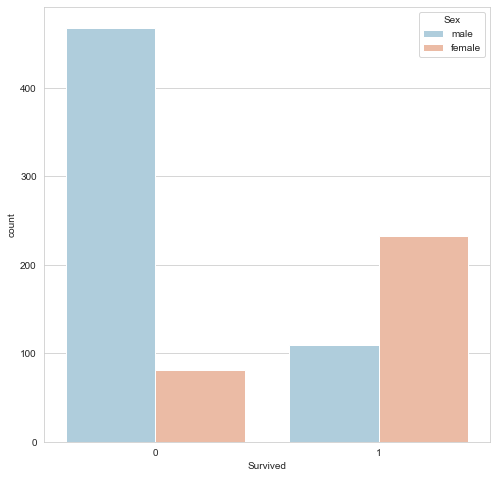

In [7]:
# Plotting a countplot to see comparison in deaths during the incident
plt.figure(figsize=(8,8))
sns.countplot(data = train, x = 'Survived', hue = 'Sex', palette='RdBu_r')
plt.show()

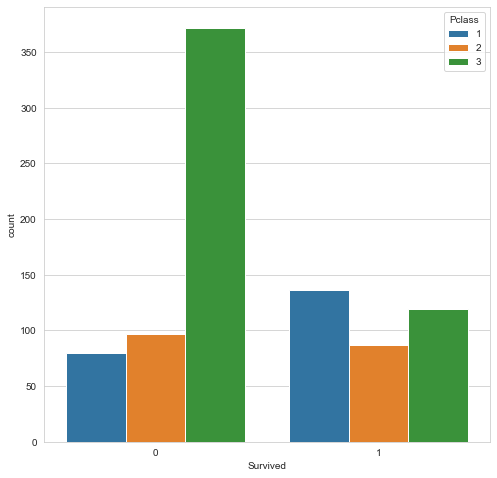

In [8]:
# Plotting a countplot to see comparison in deaths during the incident
plt.figure(figsize=(8,8))
sns.countplot(data = train, x = 'Survived', hue = 'Pclass')
plt.show()

<Figure size 864x864 with 0 Axes>

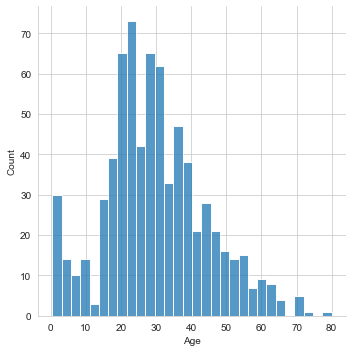

In [9]:
# Plotting a plot to check age comparison of people on Titanic
plt.figure(figsize=(12,12))
sns.displot(train['Age'].dropna(), kde = False, bins = 30)
plt.show()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


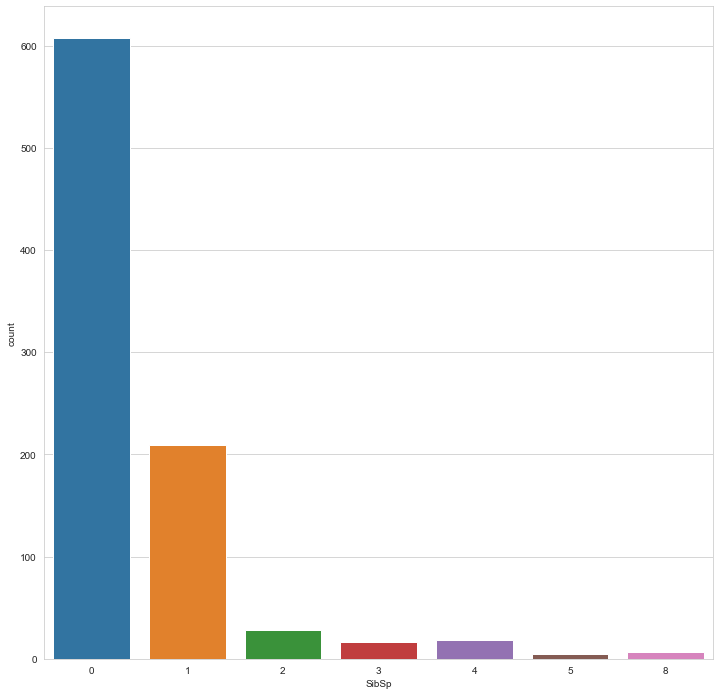

In [11]:
# Plot to check sibling/relation count
plt.figure(figsize=(12,12))
sns.countplot(x = 'SibSp', data = train)
plt.show()

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


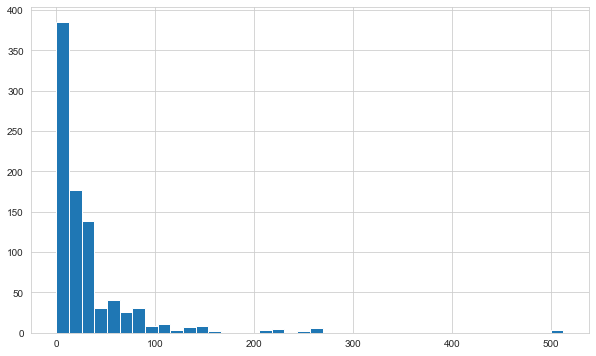

In [13]:
plt.figure(figsize=(12,12))
train['Fare'].hist(bins = 40, figsize = (10,6))
plt.show()

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
train['Fare'].iplot(kind = 'hist', bins = 40)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

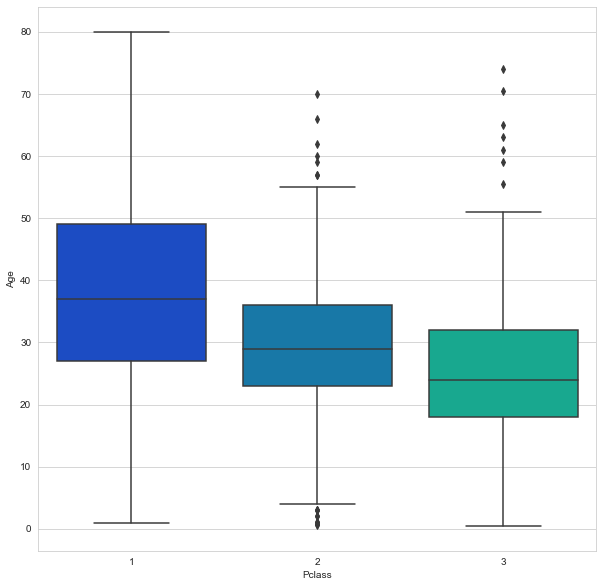

In [16]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
# Applying function to change age values in the dataframe
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

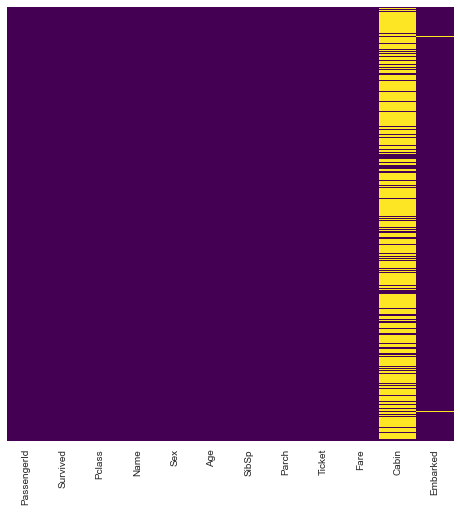

In [19]:
# Checking the heatmap again
plt.figure(figsize=(8,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
plt.show()

In [20]:
# As the Cabin column has a lot of null values, we can drop that column for further tasks
train.drop('Cabin', axis = 1, inplace = True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.shape

(891, 11)

In [23]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
# We will do the categorical analysis
male = pd.get_dummies(train['Sex'], drop_first=True)
emabark = pd.get_dummies(train['Embarked'], drop_first=True)

In [26]:
# We will concatenate the specific columns together and define train again
train = pd.concat([train, male, emabark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [27]:
# We will drop the columns that have string values and would not help in performing the final ML model
train.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [28]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### We will build a ML model using logistic regression from the available variables to predict whether the passenger survived the incident or not

In [29]:
# FEatures used to build a model are read into X
X = train.drop('Survived', axis = 1)

# Target variable
y = train['Survived']

In [30]:
# Importing Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
logmodel = LogisticRegression()

In [33]:
# Training the model
logmodel.fit(X_train, y_train)

C:\Users\psingh24\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [34]:
# Performing predictions on test set
predictions = logmodel.predict(X_test)

In [35]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [37]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)